In [1]:
%ls

random_forest_accepted_flag.ipynb  testing.csv             training.csv
test_sale_encoded.csv              train_sale_encoded.csv


In [5]:
%pwd

'/workspace/asurion_f22_wut/fe_data_v2/sale_data'

In [6]:
%ls

random_forest_accepted_flag.ipynb  testing.csv             training.csv
test_sale_encoded.csv              train_sale_encoded.csv


In [2]:
import pandas as pd
import numpy as np
# import seaborn
import matplotlib.pyplot as plt
%matplotlib inline

import pickle
import joblib
import time
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn import config_context
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import cross_val_predict 
from sklearn.model_selection import cross_val_score 
from sklearn.feature_selection import RFECV
from sklearn.metrics import precision_score, f1_score, recall_score, confusion_matrix, accuracy_score, roc_auc_score

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 500)
pd.set_option('display.float_format', '{:.2f}'.format)

import warnings
warnings.filterwarnings('ignore')

In [7]:
test = pd.read_csv('test_sale_encoded.csv', index_col='id')

In [8]:
test.head()

,quality_sale,accepted_flg,clndr_dt_cst,start_dt,lines,previous_tech_support_call,account_tenure,past_yr_claim_count,num_decline,exp,product_type,pmake,claritas_hh_count,technodoption_class,hh_income,age_class,hh_education,hh_composition,hh_tenure,urbanicity,median_income,total_population,perc_female,perc_under18,perc_over65,perc_white,perc_black,population_density,zipcode,county,state,state_code,latitude,longitude,month,hh_income_code,day_of_week,time_of_day,zipcode_accepted_prop,zipcode_rejected_offers,zipcode_accepted_offers,zipcode_total_offers
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
c27e6b798c0ae161fad4a807f097dd233a52c7b8d72c777799c0bec9,0,0,2022-07-11 00:00:00.000,2022-07-11 12:38:10.094,2,12,2364,3,2,1,SD,android,2680613,Mid-Tech,3 Upper Midscale,3 Older,3 Some College,4 Mostly w/o Kids,2 Mostly Owners,5 Rural,45238,335,49,13,27,76,0,4,97622.00,Bly,Oregon,OR,42.40,-121.08,july,3,Monday,12,0.29,5.00,2.00,7.00
014e36dbd494b72676d8010717e95f167cf79eb38943f434ae99c93e,0,0,2022-07-24 00:00:00.000,2022-07-24 16:50:45.577,2,2,806,0,1,1,SD,android,2884959,High-Tech,3 Upper Midscale,2 Middle Age,3 Some College,5 w/o Kids,2 Mostly Owners,5 Rural,75063,1951,48,24,20,96,0,68,17024.00,Elliottsburg,Pennsylvania,PA,40.41,-77.31,july,3,Sunday,16,0.00,12.00,0.00,12.00
786b36083b6a9e68355e1690228f866b085138e39619c3b928c58ba8,0,0,2022-07-14 00:00:00.000,2022-07-14 17:02:14.742,2,22,2046,2,13,1,MD,android,0,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,0,0,0,0,0,0,0,0,40588.00,Lexington,Kentucky,KY,38.03,-84.47,july,8,Thursday,17,0.00,6.00,0.00,6.00
516a88db61db9e38baac3f782fdebe4f1bf05777d6f6e4e097ed63f0,0,0,2022-07-15 00:00:00.000,2022-07-15 11:10:53.124,1,9,3057,1,7,1,SD,android,2132078,High-Tech,1 Wealthy,2 Middle Age,1 Graduate Plus,5 w/o Kids,2 Mostly Owners,7 Metro Mix,68199,53416,49,20,13,72,4,8950,2151.00,Revere,Massachusetts,MA,42.41,-71.01,july,1,Friday,11,0.05,70.00,4.00,74.00
b414065cf1c4faa6688ab996bc7a4e4dedbbbcf79945d517fb4343a2,0,0,2022-07-14 00:00:00.000,2022-07-14 17:44:22.004,2,1,4705,1,0,1,SD,android,2132078,High-Tech,1 Wealthy,2 Middle Age,1 Graduate Plus,5 w/o Kids,2 Mostly Owners,7 Metro Mix,40559,12590,49,19,9,41,49,5293,43205.00,Columbus,Ohio,OH,39.96,-82.96,july,1,Thursday,17,0.09,29.00,3.00,32.00


In [9]:
dcols = ['quality_sale', 'clndr_dt_cst', 'start_dt', 'zipcode', 'county', 'state', 
         'state_code', 'latitude', 'longitude', 'hh_income_code', 'month']

In [10]:
test.drop(columns = dcols, inplace = True)
test = test[(test['zipcode_accepted_prop'].isnull()==False)& (test['zipcode_rejected_offers'].isnull()==False)& 
            (test['zipcode_accepted_offers'].isnull()==False)&(test['zipcode_total_offers'].isnull()==False)]

In [11]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 223145 entries, c27e6b798c0ae161fad4a807f097dd233a52c7b8d72c777799c0bec9 to eabb5d70312e1d7e2e240318f84bab3fd1803639bd43cf7d1d65f712
Data columns (total 31 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   accepted_flg                223145 non-null  int64  
 1   lines                       223145 non-null  int64  
 2   previous_tech_support_call  223145 non-null  int64  
 3   account_tenure              223145 non-null  int64  
 4   past_yr_claim_count         223145 non-null  int64  
 5   num_decline                 223145 non-null  int64  
 6   exp                         223145 non-null  int64  
 7   product_type                223145 non-null  object 
 8   pmake                       223145 non-null  object 
 9   claritas_hh_count           223145 non-null  int64  
 10  technodoption_class         223145 non-null  object 
 11  hh_income                   22

In [12]:
train = pd.read_csv('train_sale_encoded.csv', index_col='id')

In [13]:
train.drop(columns = dcols, inplace = True)
train = train[(train['zipcode_accepted_prop'].isnull()==False)& (train['zipcode_rejected_offers'].isnull()==False)& 
            (train['zipcode_accepted_offers'].isnull()==False)&(train['zipcode_total_offers'].isnull()==False)]

In [14]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 863505 entries, c90ce3eaafffd07a32cb9cf4d153aef6f524b29aeef447ba3200efdb to 66b4c3759f378f38589395fd0353856239da965077903f31b30e87fc
Data columns (total 31 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   accepted_flg                863505 non-null  int64  
 1   lines                       863505 non-null  int64  
 2   previous_tech_support_call  863505 non-null  int64  
 3   account_tenure              863505 non-null  int64  
 4   past_yr_claim_count         863505 non-null  int64  
 5   num_decline                 863505 non-null  int64  
 6   exp                         863505 non-null  int64  
 7   product_type                863505 non-null  object 
 8   pmake                       863505 non-null  object 
 9   claritas_hh_count           863505 non-null  int64  
 10  technodoption_class         863505 non-null  object 
 11  hh_income                   86

In [15]:
train.shape

(863505, 31)

In [16]:
num_list = ['lines', 'previous_tech_support_call', 'account_tenure', 'past_yr_claim_count', 'num_decline', 
            'claritas_hh_count', 'median_income', 'total_population', 'perc_female', 'perc_under18',
            'perc_over65', 'perc_white', 'perc_black', 'population_density',
            'zipcode_accepted_prop', 'zipcode_rejected_offers', 'zipcode_accepted_offers', 'zipcode_total_offers']
cat_list = ['exp', 'product_type', 'pmake', 'technodoption_class', 'hh_income', 'age_class', 'hh_education', 
            'hh_composition', 'hh_tenure', 'urbanicity', 'day_of_week', 'time_of_day']
len(num_list+cat_list)

30

In [18]:
train.columns

Index(['accepted_flg', 'lines', 'previous_tech_support_call', 'account_tenure',
       'past_yr_claim_count', 'num_decline', 'exp', 'product_type', 'pmake',
       'claritas_hh_count', 'technodoption_class', 'hh_income', 'age_class',
       'hh_education', 'hh_composition', 'hh_tenure', 'urbanicity',
       'median_income', 'total_population', 'perc_female', 'perc_under18',
       'perc_over65', 'perc_white', 'perc_black', 'population_density',
       'day_of_week', 'time_of_day', 'zipcode_accepted_prop',
       'zipcode_rejected_offers', 'zipcode_accepted_offers',
       'zipcode_total_offers'],
      dtype='object')

In [17]:
test.columns

Index(['accepted_flg', 'lines', 'previous_tech_support_call', 'account_tenure',
       'past_yr_claim_count', 'num_decline', 'exp', 'product_type', 'pmake',
       'claritas_hh_count', 'technodoption_class', 'hh_income', 'age_class',
       'hh_education', 'hh_composition', 'hh_tenure', 'urbanicity',
       'median_income', 'total_population', 'perc_female', 'perc_under18',
       'perc_over65', 'perc_white', 'perc_black', 'population_density',
       'day_of_week', 'time_of_day', 'zipcode_accepted_prop',
       'zipcode_rejected_offers', 'zipcode_accepted_offers',
       'zipcode_total_offers'],
      dtype='object')

In [19]:
class_column = 'accepted_flg'
random_seed = 42
data = train.copy()
X_train, X_test, y_train, y_test = train_test_split(data.drop(columns=class_column), data[class_column],
                                                   test_size=0.3, random_state=random_seed, stratify=data[class_column])

In [20]:
onehot = OneHotEncoder(handle_unknown='ignore')
minmax = MinMaxScaler()
ct = ColumnTransformer([("onehot", onehot, cat_list),("minmax", minmax, num_list)])
pipeline = Pipeline([("col", ct), ("mdl", RandomForestClassifier(class_weight='balanced'))])

In [21]:
tuning_grid = {'mdl__n_estimators' : [10],
               'mdl__max_depth' : [2,3,4],
               'mdl__min_samples_split': [2,5,10],
               'mdl__min_samples_leaf': [1,2,5]
                }
grid_search = GridSearchCV(pipeline, param_grid = tuning_grid, cv = 5, return_train_score=True,  verbose = 1, 
                      n_jobs = -1, scoring = 'recall')
start=time.time()
grid_search.fit(X_train, y_train)
print('best score for grid search:', grid_search.best_score_)

display(grid_search.best_params_)
print('Timer:', time.time()-start, 'seconds')
random_forest_classifier = grid_search.best_estimator_

Fitting 5 folds for each of 27 candidates, totalling 135 fits
best score for grid search: 0.75785817570758


{'mdl__max_depth': 2,
 'mdl__min_samples_leaf': 1,
 'mdl__min_samples_split': 5,
 'mdl__n_estimators': 10}

Timer: 159.8774333000183 seconds


In [22]:
preds = random_forest_classifier.predict_proba(X_test)

In [23]:
print(preds)

[[0.47630535 0.52369465]
 [0.55950316 0.44049684]
 [0.45686247 0.54313753]
 ...
 [0.51012451 0.48987549]
 [0.4851049  0.5148951 ]
 [0.51012451 0.48987549]]


In [24]:
threshold=0.5
predictions = (preds[:,1] >= threshold).astype('int')
#print(np.unique(predictions, return_counts = True))
#print(np.unique(y_pred, return_counts = True))
#print(y_test)
tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()
print("random_forest",'\n',
      "recall:",recall_score(y_test, predictions),'\n',
      "precision:",precision_score(y_test, predictions),'\n',
      "f1score:",f1_score(y_test, predictions),'\n',
      'tn:{}, fp:{}, fn:{}, tp:{}'.format(tn, fp, fn, tp),'\n')

random_forest 
 recall: 0.768656426210383 
 precision: 0.12184311912467252 
 f1score: 0.21034372672129403 
 tn:90878, fp:142459, fn:5949, tp:19766 



In [25]:
joblib.dump(random_forest_classifier, 'random_forest_classifier_final_accepted_flag.pkl')

['random_forest_classifier_final_accepted_flag.pkl']

In [26]:
x = test.drop(columns=class_column)
y = test[class_column]

In [27]:
mymodel = joblib.load('random_forest_classifier_final_accepted_flag.pkl')

In [28]:
preds = mymodel.predict_proba(x)

In [29]:
threshold=0.5
predictions = (preds[:,1] >= threshold).astype('int')
tn, fp, fn, tp = confusion_matrix(y, predictions).ravel()
print("random_forest_test_july",'\n',
      "recall:",recall_score(y, predictions),'\n',
      "precision:",precision_score(y, predictions),'\n',
      "f1score:",f1_score(y, predictions),'\n',
      'tn:{}, fp:{}, fn:{}, tp:{}'.format(tn, fp, fn, tp),'\n')

random_forest_test_july 
 recall: 0.7239046391752577 
 precision: 0.09792627564917378 
 f1score: 0.17251549913946987 
 tn:80328, fp:124193, fn:5142, tp:13482 



In [30]:
threshold=0.55
predictions = (preds[:,1] >= threshold).astype('int')
tn, fp, fn, tp = confusion_matrix(y, predictions).ravel()
print("random_forest_test_july",'\n',
      "recall:",recall_score(y, predictions),'\n',
      "precision:",precision_score(y, predictions),'\n',
      "f1score:",f1_score(y, predictions),'\n',
      'tn:{}, fp:{}, fn:{}, tp:{}'.format(tn, fp, fn, tp),'\n')

random_forest_test_july 
 recall: 0.04805627147766323 
 precision: 0.13334326579261024 
 f1score: 0.07065045784654247 
 tn:198704, fp:5817, fn:17729, tp:895 



In [31]:
threshold=0.45
predictions = (preds[:,1] >= threshold).astype('int')
tn, fp, fn, tp = confusion_matrix(y, predictions).ravel()
print("random_forest_test_july",'\n',
      "recall:",recall_score(y, predictions),'\n',
      "precision:",precision_score(y, predictions),'\n',
      "f1score:",f1_score(y, predictions),'\n',
      'tn:{}, fp:{}, fn:{}, tp:{}'.format(tn, fp, fn, tp),'\n')

random_forest_test_july 
 recall: 0.8405283505154639 
 precision: 0.09066845833502267 
 f1score: 0.16368056463207423 
 tn:47524, fp:156997, fn:2970, tp:15654 



In [32]:
#get vip info
vip = random_forest_classifier.steps[1][1].feature_importances_

#create df with vip info
feature_importances_info = pd.DataFrame({'feat_names':list(random_forest_classifier.steps[0][1].transformers_[0][1].get_feature_names())+num_list, 'vip': vip})

#get sign and magnitude information
feature_importances_info = feature_importances_info.assign(feature_importances_mag = abs(feature_importances_info['vip']),
                             feature_importances_sign = np.sign(feature_importances_info['vip']))
feature_importances_info = feature_importances_info.set_index('feat_names').sort_values(by='feature_importances_mag', ascending=False)
feature_importances_info.head(10)

,vip,feature_importances_mag,feature_importances_sign
feat_names,,,
zipcode_accepted_offers,0.16,0.16,1.00
x6_Unknown,0.11,0.11,1.00
zipcode_accepted_prop,0.10,0.10,1.00
median_income,0.08,0.08,1.00
x4_Unknown,0.07,0.07,1.00
x7_Unknown,0.07,0.07,1.00
x5_Unknown,0.06,0.06,1.00
x1_MD,0.05,0.05,1.00
x1_SD,0.05,0.05,1.00


In [33]:
feature_importances_info.to_csv('feature_importances.csv')

In [34]:
!pip install seaborn

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
     |████████████████████████████████| 288 kB 4.3 MB/s eta 0:00:01


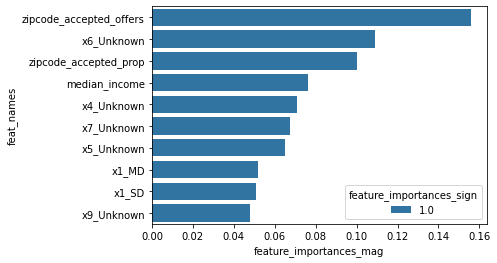

In [35]:
import seaborn as sns
sns.barplot(y=feature_importances_info.index[:10], x='feature_importances_mag', hue='feature_importances_sign', 
            data=feature_importances_info[:10], orient='h', dodge=False);

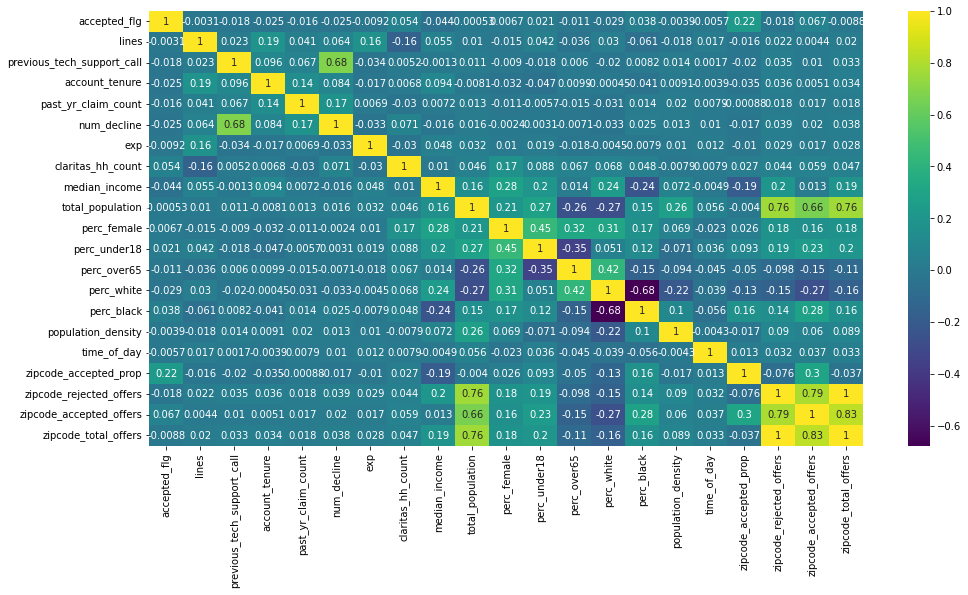

In [36]:
plt.figure(figsize = (16,8))
cor = train.corr()
sns.heatmap(cor, annot = True, cmap = "viridis")
plt.show()